<a href="https://colab.research.google.com/github/miraclehimself/Advanced_ML/blob/main/linear_regression_week1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preamble (Imports, Settings)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

%config InlineBackend.figure_format = 'retina'
sns.set(
    style='ticks',
    context='talk',
    font_scale=0.8,
    rc={'figure.figsize': (8,6)}
)

## Datasets

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0017_2223/main/datasets/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0017_2223/main/datasets/Advertising.csv',
    index_col=0
)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Those Scatter-Regplots

In [4]:
# no missing values for those two features
pima_sub = pima.query("SkinThickness>0 and BMI>0")

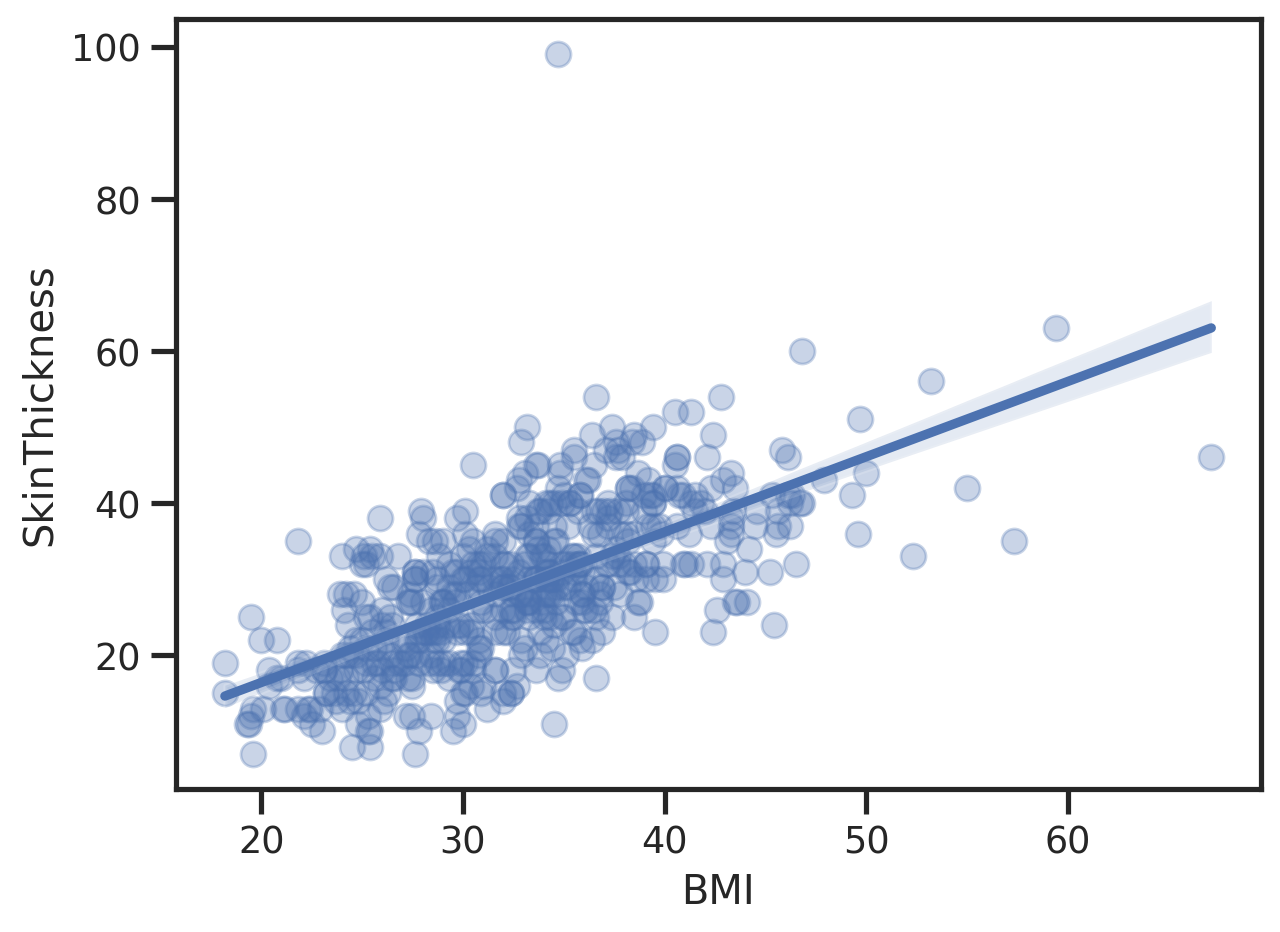

In [5]:
# things that did in Machine Learning Concepts
# a scatter plot combined with a regression line
# to support data exploration/understanding
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=pima_sub, x='BMI', y='SkinThickness',
    scatter_kws=dict(alpha=0.3), ax=ax
);

## Fitting a Simple Linear Model (`statsmodels`)

`statsmodels` helps with interpretability/teaching, but we will be sticking to `sklearn` approach for consistency.

In [6]:
ols_sales_on_TV = ols("sales ~ TV", data=adv)

In [7]:
ols_sales_on_TV = ols_sales_on_TV.fit()

In [8]:
ols_sales_on_TV.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [9]:
ols_sales_on_TV.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        02:10:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
mean_squared_error(
    adv['sales'],
    ols_sales_on_TV.predict(adv['TV']),
    squared=False
)

3.2423221486546883

## Fitting a Simple Linear Model (`sklearn`)

In [11]:
X, y = adv.drop('sales', axis=1), adv['sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
lm_sales_on_radio = LinearRegression()

In [14]:
lm_sales_on_radio.fit(X_train[['radio']], y_train)

LinearRegression()

In [15]:
mean_squared_error(
    y_test,
    lm_sales_on_radio.predict(X_test[['radio']]),
    squared=False
)

4.215601579321364

In [16]:
lm_sales_on_radio.coef_

array([0.20269074])

In [17]:
lm_sales_on_radio.intercept_

9.29749660288873

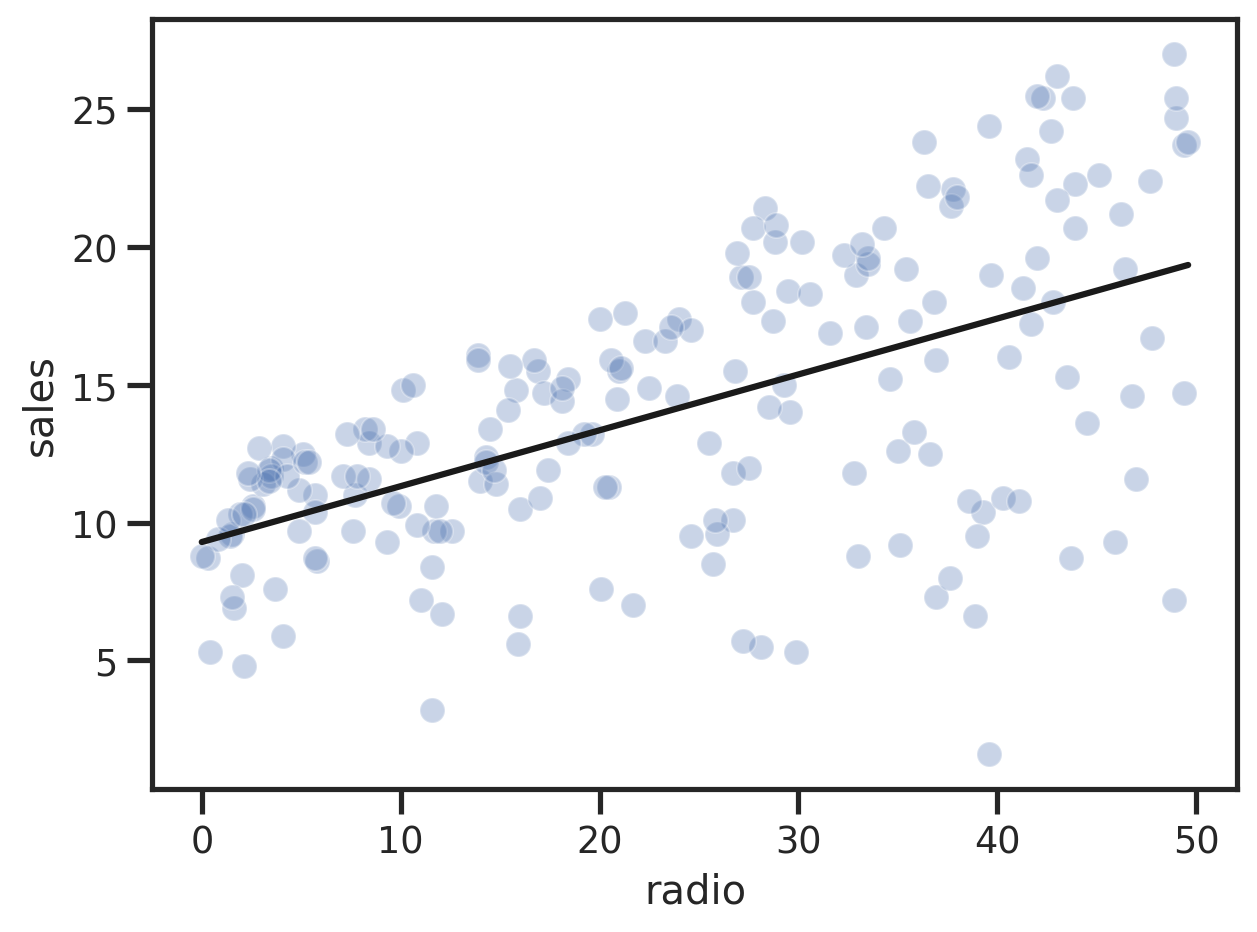

In [18]:
b0 = lm_sales_on_radio.intercept_
b1 = lm_sales_on_radio.coef_[0]
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=adv, x='radio', y='sales', alpha=0.3, ax=ax)

# plots a straight line given a point (xy1) and its slope
# more recent versions of matplotlib...
# ax.axline(xy1=(0, b0), slope=b1, color='k');

# we'll make some test data to plot the line
X_to_plot = pd.DataFrame(
    np.linspace(adv['radio'].min(), adv['radio'].max(), 100),
    columns=['radio']
)
y_pred = lm_sales_on_radio.predict(X_to_plot)
ax.plot(X_to_plot['radio'], y_pred, c='k');